# This is a test of JSBSim

We are going to experiment with the execution of the flight simulation code *JSBSim*.

This is the famous formula: $E = m c^2$

## First test: a first run

Let us now execute an external code, i.e. `JSBSim.exe`. Before doing that, let us check the prompt and the current folder contents.

In [4]:
!dir

 Il volume nell'unit… C non ha etichetta.
 Numero di serie del volume: 7A0B-F5A2

 Directory di C:\Users\agodemar\Dropbox\Jupyter\JSBSim

02/05/2016  12:45    <DIR>          .
02/05/2016  12:45    <DIR>          ..
02/05/2016  12:41    <DIR>          .ipynb_checkpoints
02/05/2016  12:35    <DIR>          aircraft
02/05/2016  12:35    <DIR>          check_cases
02/05/2016  12:35    <DIR>          engine
02/05/2016  12:37           817.849 JSBout172B.csv
06/04/2016  11:28         1.367.552 JSBSim.exe
02/05/2016  12:35    <DIR>          scripts
02/05/2016  12:35    <DIR>          systems
02/05/2016  12:45             3.737 test_1.ipynb
               3 File      2.189.138 byte
               8 Directory  266.243.014.656 byte disponibili


The exclamation mark `!` means that we can *escape* the notebook and execute a system command (in our case a command prompt).

Now we execute simply the `JSBSim.exe` with no options and see what happens.

In [3]:
!JSBSim.exe


  JSBSim version 1.0 Apr  6 2016 11:27:59

  Usage: jsbsim [script file name] [output file names] <options>

  options:
    --help  returns this message
    --version  returns the version number
    --outputlogfile=<filename>  sets (overrides) the name of a data output file
    --logdirectivefile=<filename>  specifies the name of a data logging directives file
                                   (can appear multiple times)
    --root=<path>  specifies the JSBSim root directory (where aircraft/, engine/, etc. reside)
    --aircraft=<filename>  specifies the name of the aircraft to be modeled
    --script=<filename>  specifies a script to run
    --realtime  specifies to run in actual real world time
    --nice  specifies to run at lower CPU usage
    --nohighlight  specifies that console output should be pure text only (no color)
    --suspend  specifies to suspend the simulation after initialization
    --initfile=<filename>  specifies an initilization file
    --catalog specifies that

Very good! We have JSBSim up and working in the current directory.

Now let us see the catalog of the `c172x` aircraft.

In [6]:
!JSBSim.exe --aircraft=c172x --catalog > catalog_c172x.txt


In file systems/GNCUtilities.xml: line 68
      Property navigation/actual-heading-rad is already defined.


## Second test: a script

In [9]:
!JSBSim.exe --script=scripts/c172_elevator_doublet.xml > c172_elevator_doublet.log


In file systems/GNCUtilities.xml: line 68
      Property navigation/actual-heading-rad is already defined.


Let us plot something

In [14]:
# load libraries and set plot parameters
import math
import numpy as np

import scipy

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

In [12]:
data = np.genfromtxt('JSBout172B.csv', delimiter=',', skip_header=1)

In [13]:
print(data)

[[  0.00000000e+00   0.00000000e+00  -4.43605614e-04 ...,   4.69999991e+01
    1.22000001e+02   2.09276466e+07]
 [  9.99996000e-02   2.10166602e+00   9.50972244e+00 ...,   4.69999573e+01
    1.21999979e+02   2.09276465e+07]
 [  1.99999200e-01   4.23242416e+00   1.39494364e+01 ...,   4.69999155e+01
    1.21999956e+02   2.09276464e+07]
 ..., 
 [  3.97998408e+01   4.11871222e+00   6.63585422e+00 ...,   4.69947113e+01
    1.21990502e+02   2.09271873e+07]
 [  3.98998404e+01   4.13776984e+00   6.68235999e+00 ...,   4.69947337e+01
    1.21990426e+02   2.09271808e+07]
 [  3.99998400e+01   4.16745989e+00   6.72843727e+00 ...,   4.69947571e+01
    1.21990351e+02   2.09271743e+07]]


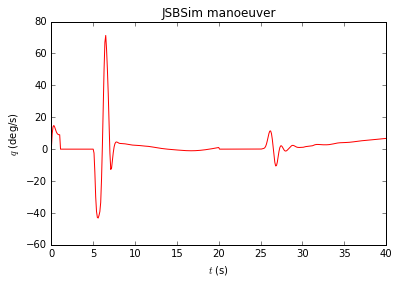

In [19]:
fig = plt.figure()

ax1 = fig.add_subplot(111)

ax1.set_title("JSBSim manoeuver")    
ax1.set_xlabel('$t$ (s)')
ax1.set_ylabel('$q$ (deg/s)')

ax1.plot(data[:,0], data[:,2], color='r', label='the data')